In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn as skl

In [14]:
df_all = pd.read_csv('../data/MAARS_all_Fri_Apr_04_14h_CEST_2014.csv',header = 0, sep='\t',encoding = "ISO-8859-1")
transc = pd.read_csv('../../MAARS_normTranscriptome_618samples_16042014.txt', header = 0, sep='\t',encoding = "ISO-8859-1")
transc = transc.transpose()

In [15]:
df_all.head()

,sample_id,clinical_group,anatomical_location,anatomical_location_label,lesional,MAARS_identifier,Institution,CUSTOM_Age,Gender,Known_Allergies_v2..Pseudo_Drug_Allergy,...,Other_concurrent_chronic_diseases_v2..Others,Other_concurrent_chronic_diseases_v2..Diabetes_.non.insulin.,Other_concurrent_chronic_diseases_v2..Thyroid_dysfunction,Other_concurrent_chronic_diseases_v2..Asthma,Other_concurrent_chronic_diseases_v2..Hypertension,Global_Assessment_Score,CUSTOM_Malignancies_._skin,CUSTOM_Malignancies_._other,CUSTOM_Fam._hist._Atopic_dermatitis,CUSTOM_Family_History_of_Psoriasis
0,MAARS_3_018_02,AD,posterior_thigh,PT,NON_LES,MAARS_3_018,UH,25,Male,False,...,False,False,False,False,False,moderate,False,False,False,NaN
1,MAARS_3_018_01,AD,posterior_thigh,PT,LES,MAARS_3_018,UH,25,Male,False,...,False,False,False,False,False,moderate,False,False,False,NaN
2,MAARS_3_018_03,AD,posterior_thigh,PT,LES,MAARS_3_018,UH,25,Male,False,...,False,False,False,False,False,moderate,False,False,False,NaN
3,MAARS_3_018_04,AD,posterior_thigh,PT,NON_LES,MAARS_3_018,UH,25,Male,False,...,False,False,False,False,False,moderate,False,False,False,NaN
4,MAARS_3_082_02,AD,posterior_thigh,PT,NON_LES,MAARS_3_082,UH,62,Male,False,...,False,False,False,False,False,moderate,False,False,True,NaN


In [16]:
#visualisation du nombre de patient unique par groupe clinique
df_all.groupby('clinical_group')['MAARS_identifier'].nunique()

clinical_group
AD       88
CTRL    117
PSO     129
Name: MAARS_identifier, dtype: int64

In [17]:
#visualisation du nombre de prélèvement par groupe clinique
df_all.groupby('clinical_group')['sample_id'].nunique()

clinical_group
AD      351
CTRL    454
PSO     512
Name: sample_id, dtype: int64

In [18]:
#visualisation du nombre unique de valeur par features
for i in df_all.columns:
    print(i+' :{}'.format(df_all[i].nunique()))

sample_id :1317
clinical_group :3
anatomical_location :5
anatomical_location_label :5
lesional :2
MAARS_identifier :334
Institution :3
CUSTOM_Age :59
Gender :2
Known_Allergies_v2..Pseudo_Drug_Allergy :2
Known_Allergies_v2..House_dust_mite :2
Known_Allergies_v2..Food :2
Known_Allergies_v2..Pollen :2
Known_Allergies_v2..Contact_Allergy :2
Known_Allergies_v2..Drug_Allergy :2
Known_Allergies_v2..Animal :2
Concomitant_Medication_v2..Anti.Hypertensive :2
Concomitant_Medication_v2..Anti.Inflammatory.non_steroid. :2
Concomitant_Medication_v2..Other_hormones :2
Concomitant_Medication_v2..Thyroid_hormones :2
Concomitant_Medication_v2..Statins :2
Concomitant_Medication_v2..Insulin :2
Concomitant_Medication_v2..Others :2
Other_concurrent_chronic_diseases_v2..Hyperlipidemia :2
Other_concurrent_chronic_diseases_v2..Others :2
Other_concurrent_chronic_diseases_v2..Diabetes_.non.insulin. :2
Other_concurrent_chronic_diseases_v2..Thyroid_dysfunction :2
Other_concurrent_chronic_diseases_v2..Asthma :2
Othe

In [19]:
#Découpage des X et y
X = df_all.drop(columns='Global_Assessment_Score',axis=1)
y = df_all['Global_Assessment_Score'].fillna('mild')

#encodage des variables dépendantes et indépendantes
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
labelencoder_y = LabelEncoder()

X['Gender_code'] = labelencoder_X.fit_transform(X['Gender'])
y = labelencoder_y.fit_transform(y)

#Effectuons une regression linéaire simple pour calculer la pvalue des 2 variables "Genre" et "sex" afin de déterminer leur lien
#avec le score de l'état de santé du patient. Une pValue petit signifiera une forte dépendance et soulignera la pertinence de stratifié 
#notre dataset ctl à partir de ces 2 variables

import statsmodels.formula.api as sm
for i in ['Gender_code', 'CUSTOM_Age']:
    regressor_OLS = sm.OLS(y, np.asarray(X[i])).fit()
    maxVar = max(regressor_OLS.pvalues).astype(float)
    print('{} {}'.format(i,regressor_OLS.summary()))

Gender_code                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1468.
Date:                Fri, 29 Nov 2019   Prob (F-statistic):          2.06e-216
Time:                        12:02:18   Log-Likelihood:                -2697.6
No. Observations:                1317   AIC:                             5397.
Df Residuals:                    1316   BIC:                             5402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6092      0.068     38.

### Conclusion du test
##### On constate que les p values sont très faibles et on peut donc rejeter H0 et conclure de la dépendance très nette entre
##### la variables 'global assessment score' et les variables genre et age
##### Nous pouvons donc procéder au découpage du dataset en stratifiant sur ces 2 variables

In [20]:
#Création d'un Xtrain X_test factices pour obtenir notre X test avec nos 30 controle stratified selon l'age et le genre du patient
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.09, random_state=42, stratify=df_all[['CUSTOM_Age','Gender']])
X_test.groupby('clinical_group')['sample_id'].count()

clinical_group
AD      44
CTRL    32
PSO     43
Name: sample_id, dtype: int64

/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


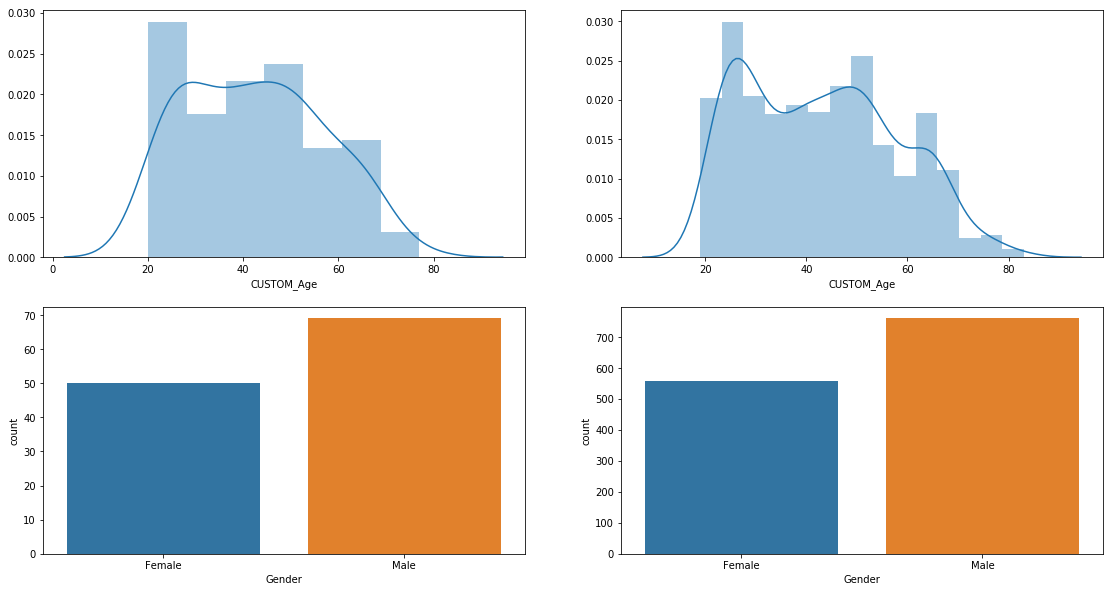

In [21]:
#comparaison des répartitions des ages et des genres entre notre df initial et notre df découpé
fig, ax = plt.subplots(2,2,figsize=(19, 10))
sns.distplot(X_test['CUSTOM_Age'],ax=ax[0,0])
sns.distplot(df_all['CUSTOM_Age'],ax=ax[0,1])
sns.countplot(X_test['Gender'],order=['Female','Male'],ax=ax[1,0])
sns.countplot(df_all['Gender'],order=['Female','Male'],ax=ax[1,1])

In [18]:
#création d'un df ctl avec les 32 patients controle et ajout d'une colonne status pour les différencier des autres patients 
df_ctl = X_test[X_test['clinical_group']=='CTRL']
df_ctl['statut'] = 'CTL stratified'
df_ctl.groupby('clinical_group')['MAARS_identifier'].nunique()

/Users/vincentgargasson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


clinical_group
CTRL    32
Name: MAARS_identifier, dtype: int64

In [59]:
#les p value des 2 variables sont autour de 0 ce qui démontrent que peut rejeter H0 et qu'elles très fortement dépendante au scorad
#Cela nous démontre 

import statsmodels.formula.api as sm
for i in ['Gender', 'CUSTOM_Age']:
    regressor_OLS = sm.OLS(y, np.asarray(X[i])).fit()
    maxVar = max(regressor_OLS.pvalues).astype(float)
    print('{} {}'.format(i,regressor_OLS.summary()))

Gender                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1468.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          2.06e-216
Time:                        18:14:59   Log-Likelihood:                -2697.6
No. Observations:                1317   AIC:                             5397.
Df Residuals:                    1316   BIC:                             5402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.6092      0.068     38.320  

In [62]:
#fusion des données cliniques avec notre nouveau df_ctl afin d'identifier les patients représentatifs de l'échantillon ctl
df_ctl = df_ctl[['MAARS_identifier','statut']]
df_final = df_all.merge(df_ctl,how='left',left_on='MAARS_identifier',right_on='MAARS_identifier')
print('null :{} sur {}'.format(df_final['statut'].isnull().sum(),len(df_final['statut'])))

null :1190 sur 1317


In [63]:
df_final['statut'].fillna(df_final['clinical_group'],inplace=True)
set(df_final.statut)

{'AD', 'CTL stratified', 'CTRL', 'PSO'}

In [64]:
df_final.groupby('statut').count()

,sample_id,clinical_group,anatomical_location,anatomical_location_label,lesional,MAARS_identifier,Institution,CUSTOM_Age,Gender,Known_Allergies_v2..Pseudo_Drug_Allergy,...,Other_concurrent_chronic_diseases_v2..Others,Other_concurrent_chronic_diseases_v2..Diabetes_.non.insulin.,Other_concurrent_chronic_diseases_v2..Thyroid_dysfunction,Other_concurrent_chronic_diseases_v2..Asthma,Other_concurrent_chronic_diseases_v2..Hypertension,Global_Assessment_Score,CUSTOM_Malignancies_._skin,CUSTOM_Malignancies_._other,CUSTOM_Fam._hist._Atopic_dermatitis,CUSTOM_Family_History_of_Psoriasis
statut,,,,,,,,,,,,,,,,,,,,,
AD,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,0
CTL stratified,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,0,127,127,127,127
CTRL,327,327,327,327,327,327,327,327,327,327,...,327,327,327,327,327,0,327,327,327,327
PSO,512,512,512,512,512,512,512,512,512,512,...,512,512,512,512,512,512,512,512,0,512


In [65]:
#je filtre uniquement sur les patients AD et CTRL
df_final = df_final.loc[(df_final['clinical_group'] == 'AD') | (df_final['clinical_group'] == 'CTRL')]
df_final.shape

(805, 35)

In [66]:
#verification qu'on a bien le bon nombre de patient par catégories sur la col statut
df_final.groupby('statut')['MAARS_identifier'].nunique()

statut
AD                88
CTL stratified    32
CTRL              85
Name: MAARS_identifier, dtype: int64

In [67]:
#1. nous prenons uniquement les échantillons CTL stratified et finissant par 3 et 4 car ils sont dans le dataset transcriptomme
def div(s):
    return s[-2:]

filter_sample = ['03' , '04']
mask_ctl = ((df_final['statut'] =='CTL stratified') & (df_final['sample_id'].map(div).isin(filter_sample)))
CTL_strat = df_final[mask_ctl]
CTL_strat.shape

(61, 35)

In [68]:
#verification qu'on a bien les échantillons dans le dataset transcriptome et nous retirons ceux qui n'y sont pas (1 seul ici)
CTL_strat = CTL_strat.assign(InTransc=CTL_strat.sample_id.isin(transc.index).astype(int))
CTL_strat = CTL_strat[CTL_strat['InTransc'] == 1]
CTL_strat.shape

(60, 36)

In [69]:
# pour finir nous faisons en sorte de sélectionner uniquement les échantillons d'un patient unique
# et non pas plusieurs échantillons d'un même patient

# Pour ce faire, nous prenons mettons dans un premier temps les identifiants uniques des patients dans une listes 
unique_id  = set(CTL_strat['MAARS_identifier'])
list_unique = []
for i in unique_id:
    list_unique.append(i)

#Puis nous découpons cette listes en 2 pour associer par la suite à ces identifiants l'extension 03 ou 04 
#qui permettra d'obtenir des prélèvements des 2 types de façon équilibrée

list_id03 = list_unique[:16]
list_id04 = list_unique[16:]
print('longueur liste03 : {} et longeur de la liste04 : {}'.format(len(list_id03),len(list_id04)))

longueur liste03 : 16 et longeur de la liste04 : 16


In [74]:
ext03 = '_03'
ext04 = '_04'

#associons l'extension pour nos 2 listes ==> Nous passons d'un id patients à un id prélèvement

list_sample03 = [s + ext03 for s in list_id03]
list_sample04 = [s + ext04 for s in list_id04]

list_sample03_fin = []
list_sample04_fin = []

#nous vérifions que ces prélèvements existes bien dans notre colonne Sample id

for i in CTL_strat['sample_id']:
    for j in list_sample03:
        if i == j:
            list_sample03_fin.append(j)
            
for i in CTL_strat['sample_id']:
    for j in list_sample04:
        if i == j:
            list_sample04_fin.append(j)
print('Nous avons au final {} prélèvements 03 et {} prélèvements 04.'.format(len(list_sample03_fin),len(list_sample04_fin)))

Nous avons au final 15 prélèvements 03 et 15 prélèvements 04.


In [75]:
#fusion des 2 listes pour obtenir notre liste finale d'échantillons CTL stratifié
list_finale = list_sample03_fin
list_finale.extend(list_sample04_fin)
print(len(list_finale))

30


In [80]:
mask = [s in list_finale for s in CTL_strat['sample_id']]
df_final  = CTL_strat[mask].iloc[:,:-4]
df_final.head()

,sample_id,clinical_group,anatomical_location,anatomical_location_label,lesional,MAARS_identifier,Institution,CUSTOM_Age,Gender,Known_Allergies_v2..Pseudo_Drug_Allergy,...,Concomitant_Medication_v2..Others,Other_concurrent_chronic_diseases_v2..Hyperlipidemia,Other_concurrent_chronic_diseases_v2..Others,Other_concurrent_chronic_diseases_v2..Diabetes_.non.insulin.,Other_concurrent_chronic_diseases_v2..Thyroid_dysfunction,Other_concurrent_chronic_diseases_v2..Asthma,Other_concurrent_chronic_diseases_v2..Hypertension,Global_Assessment_Score,CUSTOM_Malignancies_._skin,CUSTOM_Malignancies_._other
363,MAARS_2_053_03,CTRL,thigh,T,NON_LES,MAARS_2_053,KINGS,65,Female,False,...,False,False,False,False,False,False,False,NaN,False,False
367,MAARS_2_071_03,CTRL,thigh,T,NON_LES,MAARS_2_071,KINGS,47,Female,False,...,False,False,False,False,False,False,False,NaN,False,False
397,MAARS_2_073_03,CTRL,thigh,T,NON_LES,MAARS_2_073,KINGS,23,Male,False,...,True,False,False,False,False,False,False,NaN,False,False
448,MAARS_2_024_03,CTRL,thigh,T,NON_LES,MAARS_2_024,KINGS,39,Female,False,...,False,False,False,False,False,False,False,NaN,False,False
453,MAARS_2_060_04,CTRL,lower_back,LB,NON_LES,MAARS_2_060,KINGS,33,Male,False,...,False,False,False,False,False,False,False,NaN,False,False


In [82]:
#envoi en csv
df_final.to_csv(r'../Data/clinical_dataset_with_stratified_CTRL_patients.csv')